In [43]:
import pandas as pd
import plotly.express as px
import os  # Libreria per manipolare i percorsi dei file

pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = [r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx",
         r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx", 
         r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx"]

# Faccio un dizionario per mappare i file agli anni
year_mapping = {'difensori_2023.xlsx': 2023, 'difensori_2022.xlsx': 2022,
                'difensori_2021.xlsx': 2021, 'difensori_2020.xlsx': 2020, 
                'difensori 2019.xlsx': 2019}
# Questa parte di codice crea 5 figure che rappresentano il riquadro di correlazione fra le statistiche per annata

correlations = []
years = []


colonne_da_eliminare = ['Player','Squad','Nation','Pos','short Cmp%','medium Cmp%','long Cmp%', 'CrdY + CrdR', 'AerTot']

for file in files:
    
    data_frame = pd.read_excel(file)

    # Converte le colonne in numeriche, forzando i valori non convertibili in NaN
   # data_frame = data_frame.apply(pd.to_numeric, errors='coerce')
    
    # Rimuove le colonne non numeriche o quelle specificate
    data_frame.drop(columns=colonne_da_eliminare, inplace=True)

    # Calcolo della matrice di correlazione
    corr_matrix = data_frame.corr()

    # Estrae solo il nome del file dal percorso completo
    file_name = os.path.basename(file)
    year = year_mapping[file_name]
    years.append(year)

    # Visualizza la matrice di correlazione con dimensioni maggiori
    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}", width=800, height=800)
    fig.show()

print(f'Le colonne usate per questa analisi sono {list(data_frame.columns)}')


Le colonne usate per questa analisi sono ['Age', 'Tkl', 'TklW', 'Blocks', 'Sh', 'Pass', 'Err', 'MP', 'Gls', 'Ast', 'CrdY', 'CrdR', 'KP', 'Fls', 'Crs', 'OG', 'AerWon', 'AerLost']


In [44]:
def best_worst(stat):
    for file in files:
        file_name = os.path.basename(file)
        year = year_mapping[file_name]
        data_frame = pd.read_excel(file)
        data_frame.drop(columns=colonne_da_eliminare, inplace=True)
        # Aggiungi qui la logica per la funzione best_worst

for file in files:
    data_frame = pd.read_excel(file)
    data_frame.drop(columns=colonne_da_eliminare, inplace=True)
    corr_matrix = data_frame.corr()
    file_name = os.path.basename(file)
    year = year_mapping[file_name]
    years.append(year)
    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}", width=800, height=800)
    fig.show()
    print(f'Le colonne usate per questa analisi sono {list(data_frame.columns)}')

# Esegui le funzioni best_worst e correlazione come necessario

Le colonne usate per questa analisi sono ['Age', 'MP', 'Ast', 'KP', 'Tkl', 'TklW', 'Blocks', 'Sh', 'Pass', 'Err', 'CrdY', 'CrdR', 'Fls', 'Crs', 'OG', 'AerWon', 'AerLost', 'Gls']


Le colonne usate per questa analisi sono ['Age', 'Tkl', 'TklW', 'Blocks', 'Sh', 'Pass', 'Err', 'MP', 'Gls', 'Ast', 'CrdY', 'CrdR', 'KP', 'Fls', 'OG', 'AerWon', 'AerLost']


Le colonne usate per questa analisi sono ['Age', 'Tkl', 'TklW', 'Blocks', 'Sh', 'Pass', 'Err', 'MP', 'Gls', 'Ast', 'CrdY', 'CrdR', 'KP', 'Fls', 'Crs', 'OG', 'AerWon', 'AerLost']


Le colonne usate per questa analisi sono ['Age', 'Tkl', 'TklW', 'Blocks', 'Sh', 'Pass', 'Err', 'MP', 'Gls', 'Ast', 'CrdY', 'CrdR', 'KP', 'Fls', 'Crs', 'OG', 'AerWon', 'AerLost']


Le colonne usate per questa analisi sono ['Age', 'Tkl', 'TklW', 'Blocks', 'Sh', 'Pass', 'Err', 'MP', 'Gls', 'Ast', 'CrdY', 'CrdR', 'KP', 'Fls', 'Crs', 'OG', 'AerWon', 'AerLost']


In [57]:

# Creo una funzione che mi permette di scoprire quali sono le statistiche meglio e peggio correlate con una desiderata

def best_worst(stat):
 for file in files:
    year = year_mapping[file]
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()

    if stat in corr_matrix.columns:
        # Ordina le correlazioni con la statistica scelta
        sorted_corr = corr_matrix[stat].sort_values(ascending=False)

        # Trova le 5 migliori e peggiori correlazioni (cambiare i range per saperne di più o di meno)
        best_corr = sorted_corr[1:6]  # Parto da 1 per evitare la correlazione della statistica con se stessa
        worst_corr = sorted_corr[-5:]

        print(f"Anno {year}: Le 5 statistiche meglio correlate con {stat} sono:\n{best_corr}")
        print(f"Anno {year}: Le 5 statistiche peggio correlate con {stat} sono:\n{worst_corr}")
    else:
        print(f"La statistica {stat} non è presente nel dataset. Controlla l'input")

# Creo una funzione che restituisce l'elenco degli indci di correlazione di una statistica con le altre anno per anno

def correlazioni_annuali(stat):
    for file in files:
        year = year_mapping[file]
        data_frame = pd.read_excel(file)  

        data_frame.drop(columns=colonne_da_eliminare, inplace=True)

        corr_matrix = data_frame.corr()

        if stat in corr_matrix.columns:
            sorted_corr = corr_matrix[stat].sort_values(ascending=False)

            print(f"Anno {year}: Le correlazioni per {stat} sono:\n{sorted_corr}\n")
        else:
            print(f"La statistica {stat} non è presente nel dataset dell'anno {year}.")
        
# Creo una seconda funzione che mi dice l'indice di correlazione di due statistiche specifiche
# ed il cambiamento di questo nel corso delle stagioni

def correlazione(stat1,stat2):
 correlations = []

 for file in files:
    
    data_frame = pd.read_excel(file)

    data_frame.drop(columns=colonne_da_eliminare, inplace=True)

    corr_matrix = data_frame.corr()

    year = year_mapping[file]

    # Verifica se entrambe le statistiche esistono nella matrice di correlazione
    if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
        correlation_value = corr_matrix.loc[stat1, stat2]
        correlations.append((year, correlation_value))
        #print(f"Anno {year}: Correlazione tra {stat1} e {stat2} = {correlation_value}")
    else:
        correlations.append((year, None))

# Creazione del DataFrame per il grafico
 if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
    correlation_df = pd.DataFrame(correlations, columns=['Anno', 'Correlazione'])
    
    # Crea il grafico dell'andamento della correlazione nel tempo
    fig = px.line(correlation_df, x='Anno', y='Correlazione', title=f"Correlazione tra {stat1} e {stat2}", markers=True)
    fig.update_xaxes(dtick=1)
    fig.update_yaxes(range = [-1,1], dtick = 0.10)
    fig.show()
 else:
    print("Nessun grafico disponibile: non sono state calcolate correlazioni valide. Controlla l'input")

Correlazione tra MP e TklW per l'anno 2019: 0.8159361774637137
Correlazione tra MP e TklW per l'anno 2020: 0.8136479281363007
Correlazione tra MP e TklW per l'anno 2021: 0.8009032928731835
Correlazione tra MP e TklW per l'anno 2022: 0.8151797338814638
Correlazione tra MP e TklW per l'anno 2023: 0.7855540622004676
Correlazione tra MP e Blocks per l'anno 2019: 0.8516348261858092
Correlazione tra MP e Blocks per l'anno 2020: 0.8553045166832738
Correlazione tra MP e Blocks per l'anno 2021: 0.8349892171772395
Correlazione tra MP e Blocks per l'anno 2022: 0.8447194760142275
Correlazione tra MP e Blocks per l'anno 2023: 0.8146209837914686
Correlazione tra MP e AerWon per l'anno 2019: 0.7173041336446766
Correlazione tra MP e AerWon per l'anno 2020: 0.70042668059311
Correlazione tra MP e AerWon per l'anno 2021: 0.6493246440870366
Correlazione tra MP e AerWon per l'anno 2022: 0.664257973237839
Correlazione tra MP e AerWon per l'anno 2023: 0.6526750874333765


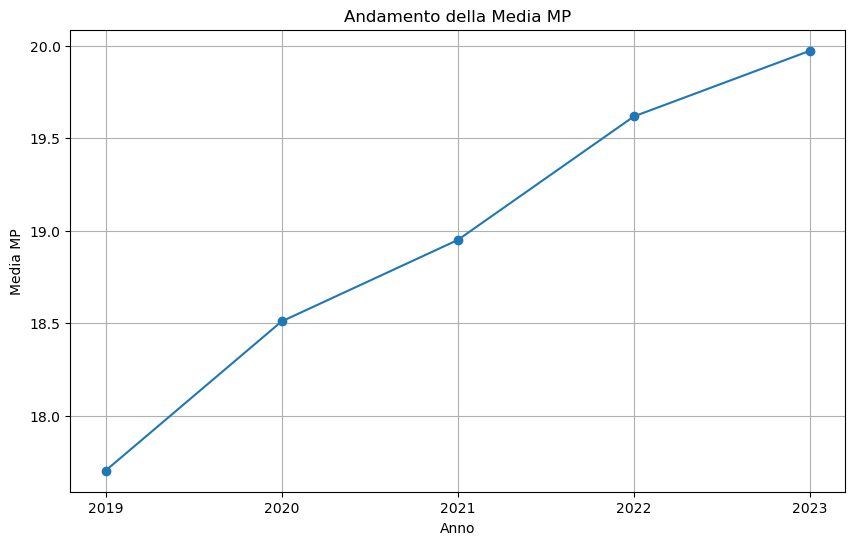

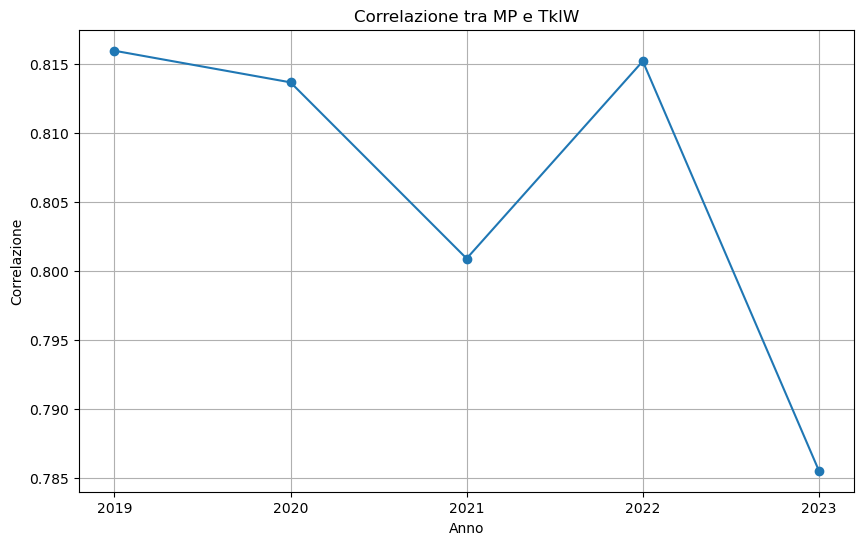

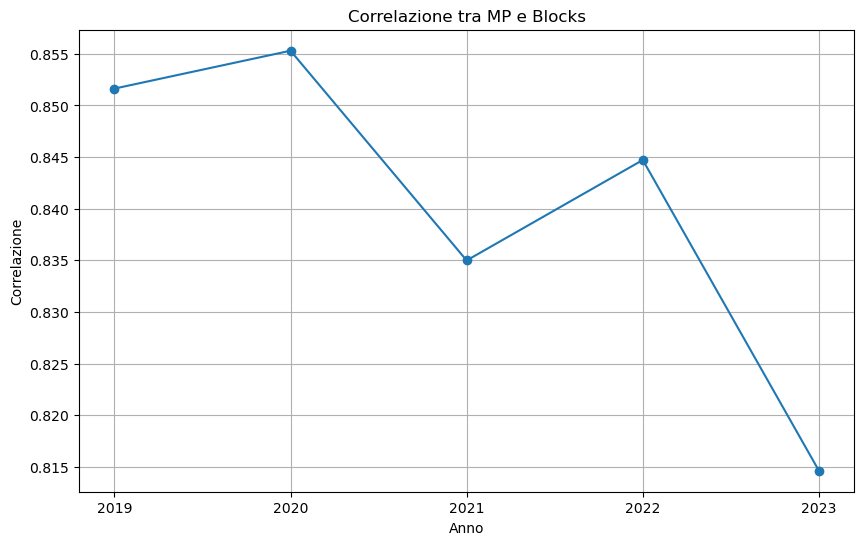

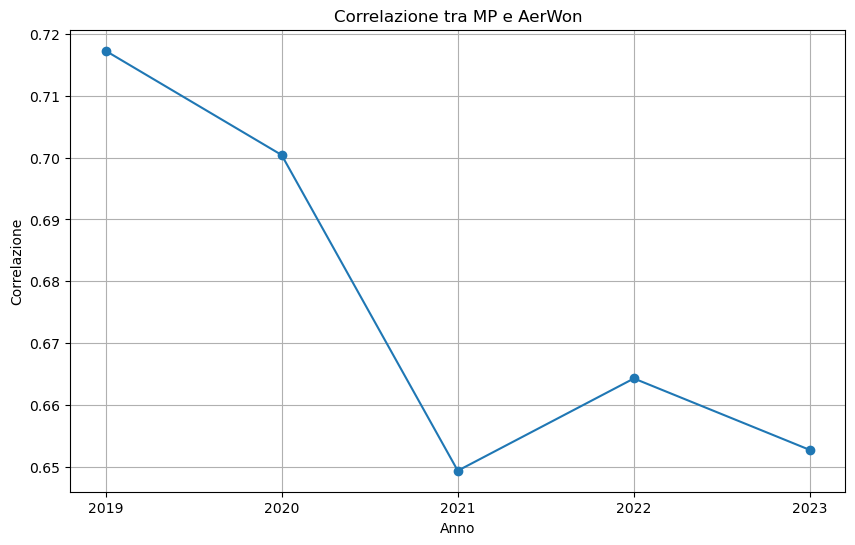

In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Imposta le opzioni di visualizzazione
pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = [
    r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx"
]

# Mappatura degli anni
year_mapping = {
    'difensori_2023.xlsx': 2023,
    'difensori_2022.xlsx': 2022,
    'difensori_2021.xlsx': 2021,
    'difensori_2020.xlsx': 2020,
    'difensori 2019.xlsx': 2019
}

# Colonne da eliminare
colonne_da_eliminare = ['Player', 'Squad', 'Nation', 'Pos', 'short Cmp%', 'medium Cmp%', 'long Cmp%', 'CrdY + CrdR', 'AerTot']

def best_worst(stat):
    results = []
    for file in files:
        file_name = os.path.basename(file)
        year = year_mapping[file_name]
        data_frame = pd.read_excel(file)
        data_frame.drop(columns=colonne_da_eliminare, inplace=True)
        
        # Calcola la media della statistica per l'anno corrente
        mean_stat = data_frame[stat].mean()
        results.append((year, mean_stat))
    
    return results

def correlazione(stat1, stat2):
    results = []
    for file in files:
        file_name = os.path.basename(file)  # Estrai solo il nome del file
        year = year_mapping[file_name]  # Usa il nome del file per ottenere l'anno
        data_frame = pd.read_excel(file)
        data_frame.drop(columns=colonne_da_eliminare, inplace=True)
        
        # Calcola la matrice di correlazione
        corr_matrix = data_frame.corr()
        
        # Verifica se entrambe le statistiche esistono nella matrice di correlazione
        if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
            correlation_value = corr_matrix.loc[stat1, stat2]
            results.append((year, correlation_value))
            print(f'Correlazione tra {stat1} e {stat2} per l\'anno {year}: {correlation_value}')
        else:
            print(f'Una delle statistiche {stat1} o {stat2} non esiste nel file {file_name}.')
    
    return results

# Esempio di utilizzo
stat = 'MP'
best_worst_results = best_worst(stat)

stat1 = 'MP'
stat2 = 'TklW'
correlazione_results_1 = correlazione(stat1, stat2)

stat2 = 'Blocks'
correlazione_results_2 = correlazione(stat1, stat2)

stat2 = 'AerWon'
correlazione_results_3 = correlazione(stat1, stat2)

# Creazione dei grafici separati
def plot_single_trend(years, values, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(years, values, marker='o')
    plt.xlabel('Anno')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.xticks(years)  # Mostra gli anni sull'asse x
    plt.show()

# Chiamata alla funzione per creare i grafici separati
years = [result[0] for result in best_worst_results]
best_worst_values = [result[1] for result in best_worst_results]
plot_single_trend(years, best_worst_values, f'Andamento della Media {stat}', f'Media {stat}')

correlation_years_1 = [result[0] for result in correlazione_results_1]
correlation_values_1 = [result[1] for result in correlazione_results_1]
plot_single_trend(correlation_years_1, correlation_values_1, f'Correlazione tra {stat1} e TklW', 'Correlazione')

correlation_years_2 = [result[0] for result in correlazione_results_2]
correlation_values_2 = [result[1] for result in correlazione_results_2]
plot_single_trend(correlation_years_2, correlation_values_2, f'Correlazione tra {stat1} e Blocks', 'Correlazione')

correlation_years_3 = [result[0] for result in correlazione_results_3]
correlation_values_3 = [result[1] for result in correlazione_results_3]
plot_single_trend(correlation_years_3, correlation_values_3, f'Correlazione tra {stat1} e AerWon', 'Correlazione')

Correlazione tra Tkl e CrdY per l'anno 2019: 0.7167581209823707
Correlazione tra Tkl e CrdY per l'anno 2020: 0.6814030237354917
Correlazione tra Tkl e CrdY per l'anno 2021: 0.6974672896268266
Correlazione tra Tkl e CrdY per l'anno 2022: 0.669035641546326
Correlazione tra Tkl e CrdY per l'anno 2023: 0.6165873153199711
Correlazione tra Tkl e CrdR per l'anno 2019: 0.20294820753711662
Correlazione tra Tkl e CrdR per l'anno 2020: 0.20520729301423904
Correlazione tra Tkl e CrdR per l'anno 2021: 0.22192558220806033
Correlazione tra Tkl e CrdR per l'anno 2022: 0.14782383286323844
Correlazione tra Tkl e CrdR per l'anno 2023: 0.1932587412352773
Correlazione tra Tkl e Fls per l'anno 2019: 0.8278278238611035
Correlazione tra Tkl e Fls per l'anno 2020: 0.8180075201043707
Correlazione tra Tkl e Fls per l'anno 2021: 0.7892933668423131
Correlazione tra Tkl e Fls per l'anno 2022: 0.8003142000190173
Correlazione tra Tkl e Fls per l'anno 2023: 0.7633964515698843


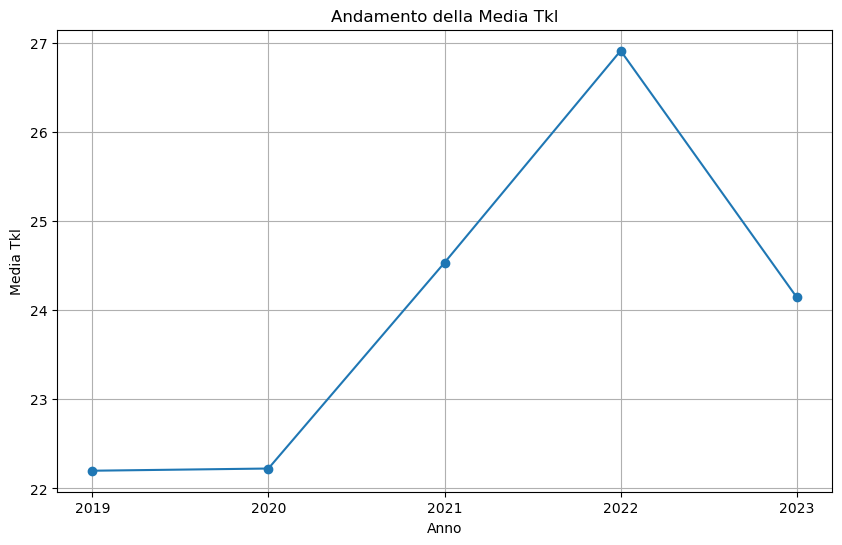

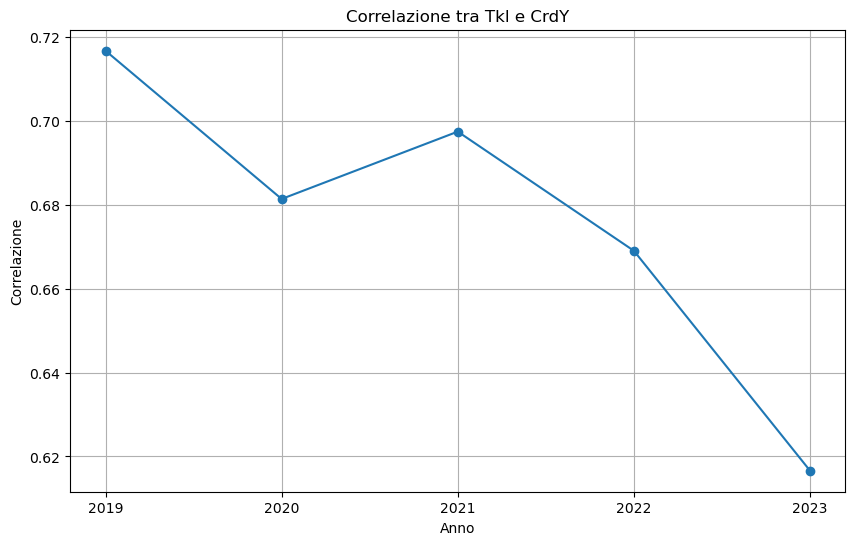

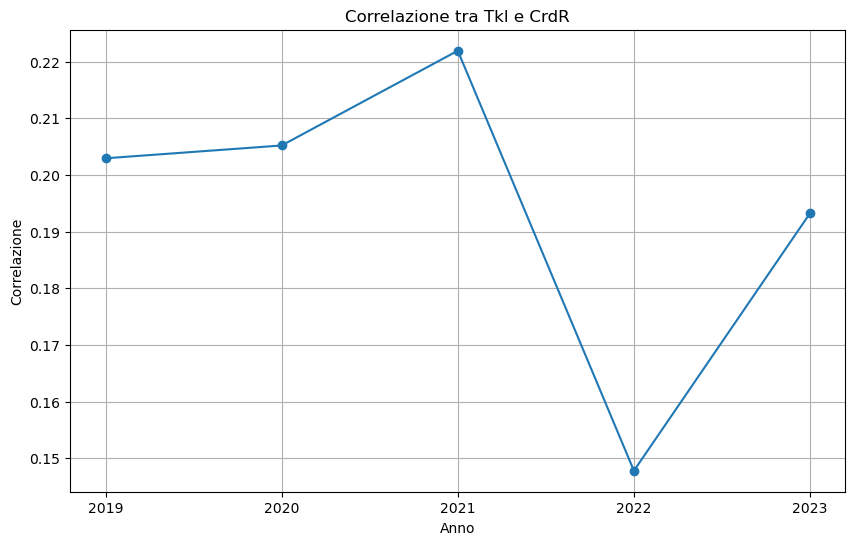

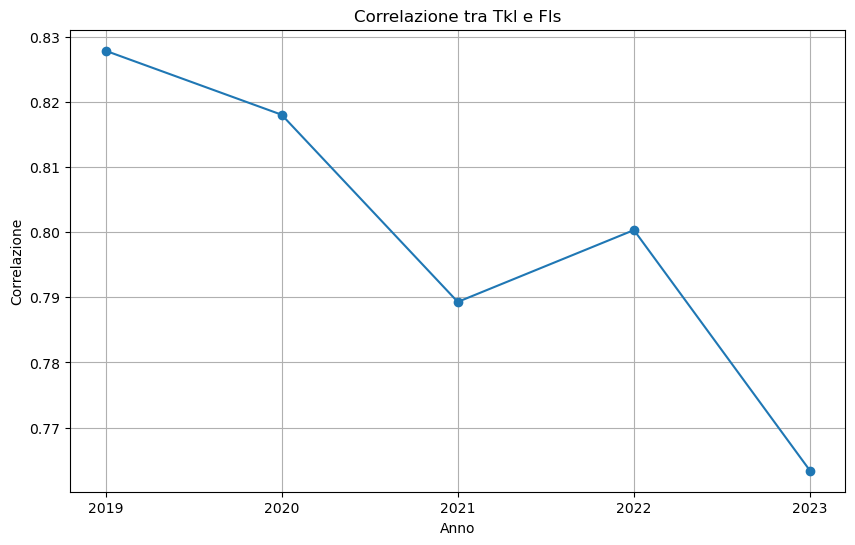

In [65]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Imposta le opzioni di visualizzazione
pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = [
    r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx"
]

# Mappatura degli anni
year_mapping = {
    'difensori_2023.xlsx': 2023,
    'difensori_2022.xlsx': 2022,
    'difensori_2021.xlsx': 2021,
    'difensori_2020.xlsx': 2020,
    'difensori 2019.xlsx': 2019
}

# Colonne da eliminare
colonne_da_eliminare = ['Player', 'Squad', 'Nation', 'Pos', 'short Cmp%', 'medium Cmp%', 'long Cmp%', 'CrdY + CrdR', 'AerTot']

def best_worst(stat):
    results = []
    for file in files:
        file_name = os.path.basename(file)
        year = year_mapping[file_name]
        data_frame = pd.read_excel(file)
        data_frame.drop(columns=colonne_da_eliminare, inplace=True)
        
        # Calcola la media della statistica per l'anno corrente
        mean_stat = data_frame[stat].mean()
        results.append((year, mean_stat))
    
    return results

def correlazione(stat1, stat2):
    results = []
    for file in files:
        file_name = os.path.basename(file)  # Estrai solo il nome del file
        year = year_mapping[file_name]  # Usa il nome del file per ottenere l'anno
        data_frame = pd.read_excel(file)
        data_frame.drop(columns=colonne_da_eliminare, inplace=True)
        
        # Calcola la matrice di correlazione
        corr_matrix = data_frame.corr()
        
        # Verifica se entrambe le statistiche esistono nella matrice di correlazione
        if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
            correlation_value = corr_matrix.loc[stat1, stat2]
            results.append((year, correlation_value))
            print(f'Correlazione tra {stat1} e {stat2} per l\'anno {year}: {correlation_value}')
        else:
            print(f'Una delle statistiche {stat1} o {stat2} non esiste nel file {file_name}.')
    
    return results

def plot_single_trend(years, values, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(years, values, marker='o')
    plt.xlabel('Anno')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.xticks(years)  # Mostra gli anni sull'asse x
    plt.show()


stat = 'Tkl'
best_worst_results_tkl = best_worst(stat)

stat1 = 'Tkl'
stat2 = 'CrdY'
correlazione_results_tkl_crdy = correlazione(stat1, stat2)

stat2 = 'CrdR'
correlazione_results_tkl_crdr = correlazione(stat1, stat2)

stat2 = 'Fls'
correlazione_results_tkl_fls = correlazione(stat1, stat2)

# Chiamata alla funzione per creare i grafici separati per le nuove statistiche
years_tkl = [result[0] for result in best_worst_results_tkl]
best_worst_values_tkl = [result[1] for result in best_worst_results_tkl]
plot_single_trend(years_tkl, best_worst_values_tkl, f'Andamento della Media {stat}', f'Media {stat}')

correlation_years_tkl_crdy = [result[0] for result in correlazione_results_tkl_crdy]
correlation_values_tkl_crdy = [result[1] for result in correlazione_results_tkl_crdy]
plot_single_trend(correlation_years_tkl_crdy, correlation_values_tkl_crdy, f'Correlazione tra {stat1} e CrdY', 'Correlazione')

correlation_years_tkl_crdr = [result[0] for result in correlazione_results_tkl_crdr]
correlation_values_tkl_crdr = [result[1] for result in correlazione_results_tkl_crdr]
plot_single_trend(correlation_years_tkl_crdr, correlation_values_tkl_crdr, f'Correlazione tra {stat1} e CrdR', 'Correlazione')

correlation_years_tkl_fls = [result[0] for result in correlazione_results_tkl_fls]
correlation_values_tkl_fls = [result[1] for result in correlazione_results_tkl_fls]
plot_single_trend(correlation_years_tkl_fls, correlation_values_tkl_fls, f'Correlazione tra {stat1} e Fls', 'Correlazione')

Correlazione tra Pass e KP per l'anno 2019: 0.622081198363798
Correlazione tra Pass e KP per l'anno 2020: 0.6157430175231996
Correlazione tra Pass e KP per l'anno 2021: 0.5830397048190965
Correlazione tra Pass e KP per l'anno 2022: 0.5791765701976532
Correlazione tra Pass e KP per l'anno 2023: 0.5459051523327018
Correlazione tra Pass e Err per l'anno 2019: 0.31664065067574915
Correlazione tra Pass e Err per l'anno 2020: 0.33827087303198167
Correlazione tra Pass e Err per l'anno 2021: 0.2848007856846977
Correlazione tra Pass e Err per l'anno 2022: 0.16583554679291213
Correlazione tra Pass e Err per l'anno 2023: 0.1769743428618459
Correlazione tra Pass e Ast per l'anno 2019: 0.4843261738168098
Correlazione tra Pass e Ast per l'anno 2020: 0.554091489051135
Correlazione tra Pass e Ast per l'anno 2021: 0.5424446853145981
Correlazione tra Pass e Ast per l'anno 2022: 0.48035860264494107
Correlazione tra Pass e Ast per l'anno 2023: 0.4616735368475237


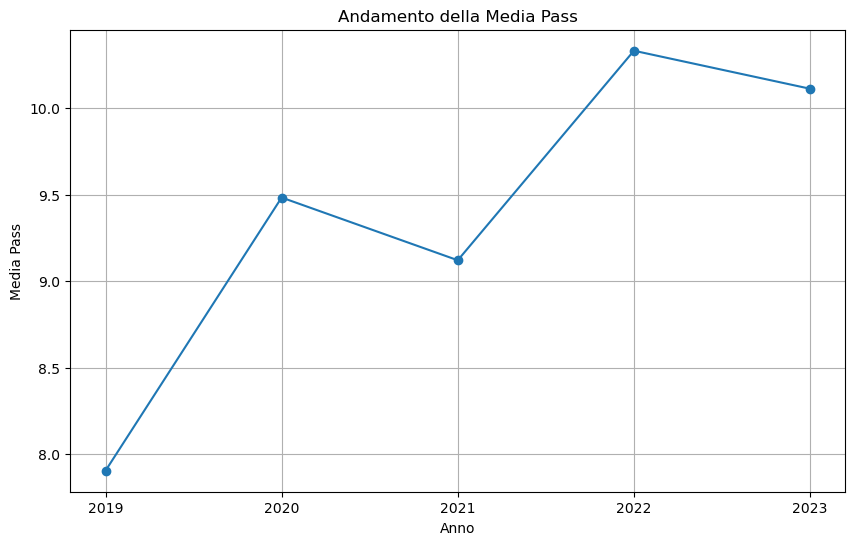

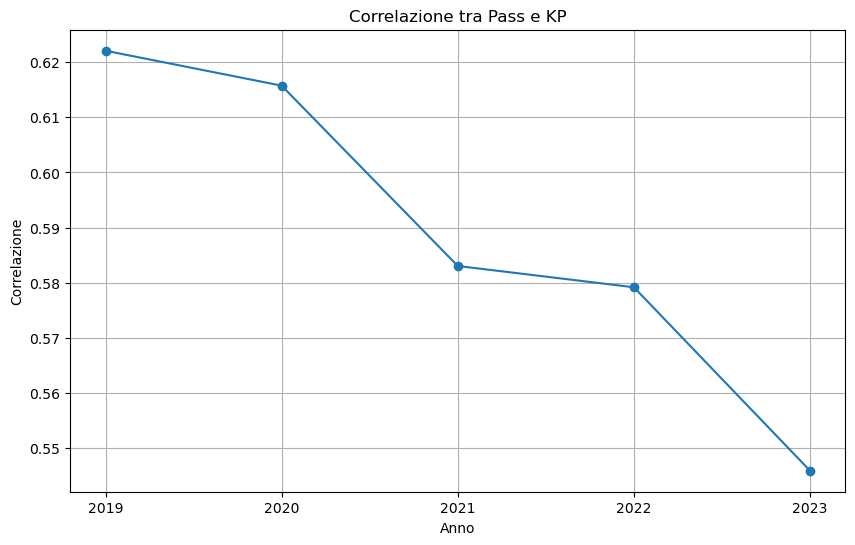

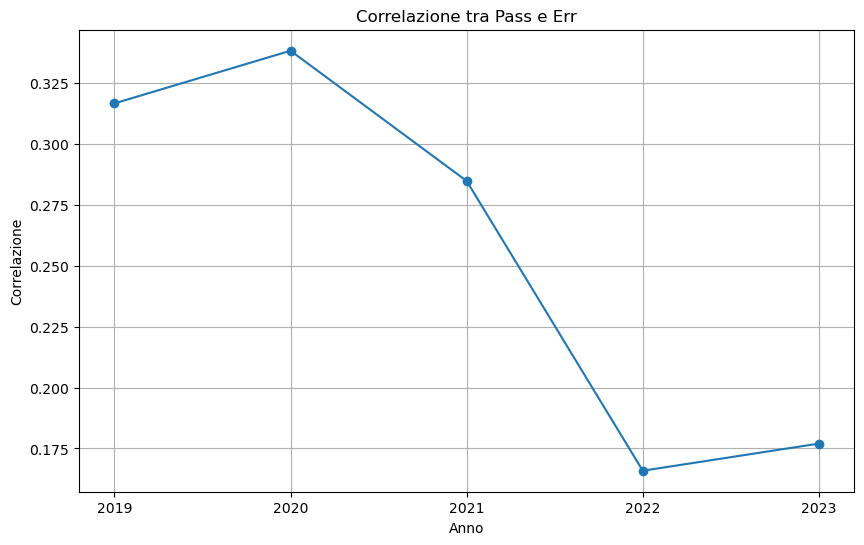

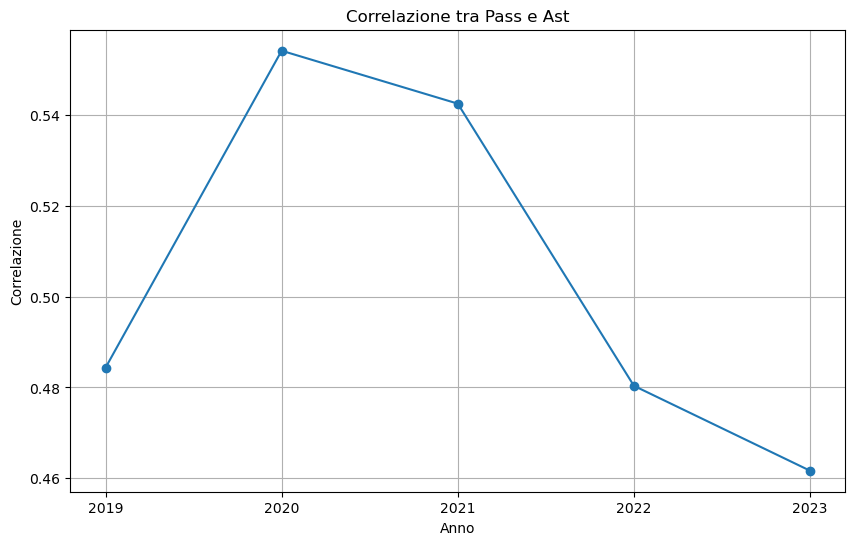

In [66]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Imposta le opzioni di visualizzazione
pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = [
    r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx"
]

# Mappatura degli anni
year_mapping = {
    'difensori_2023.xlsx': 2023,
    'difensori_2022.xlsx': 2022,
    'difensori_2021.xlsx': 2021,
    'difensori_2020.xlsx': 2020,
    'difensori 2019.xlsx': 2019
}

# Colonne da eliminare
colonne_da_eliminare = ['Player', 'Squad', 'Nation', 'Pos', 'short Cmp%', 'medium Cmp%', 'long Cmp%', 'CrdY + CrdR', 'AerTot']

def best_worst(stat):
    results = []
    for file in files:
        file_name = os.path.basename(file)
        year = year_mapping[file_name]
        data_frame = pd.read_excel(file)
        data_frame.drop(columns=colonne_da_eliminare, inplace=True)
        
        # Calcola la media della statistica per l'anno corrente
        mean_stat = data_frame[stat].mean()
        results.append((year, mean_stat))
    
    return results

def correlazione(stat1, stat2):
    results = []
    for file in files:
        file_name = os.path.basename(file)  # Estrai solo il nome del file
        year = year_mapping[file_name]  # Usa il nome del file per ottenere l'anno
        data_frame = pd.read_excel(file)
        data_frame.drop(columns=colonne_da_eliminare, inplace=True)
        
        # Calcola la matrice di correlazione
        corr_matrix = data_frame.corr()
        
        # Verifica se entrambe le statistiche esistono nella matrice di correlazione
        if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
            correlation_value = corr_matrix.loc[stat1, stat2]
            results.append((year, correlation_value))
            print(f'Correlazione tra {stat1} e {stat2} per l\'anno {year}: {correlation_value}')
        else:
            print(f'Una delle statistiche {stat1} o {stat2} non esiste nel file {file_name}.')
    
    return results

def plot_single_trend(years, values, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(years, values, marker='o')
    plt.xlabel('Anno')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.xticks(years)  # Mostra gli anni sull'asse x
    plt.show()

# Nuovo esempio di utilizzo
stat = 'Pass'
best_worst_results_pass = best_worst(stat)

stat1 = 'Pass'
stat2 = 'KP'
correlazione_results_pass_kp = correlazione(stat1, stat2)

stat2 = 'Err'
correlazione_results_pass_err = correlazione(stat1, stat2)

stat2 = 'Ast'
correlazione_results_pass_ast = correlazione(stat1, stat2)

# Chiamata alla funzione per creare i grafici separati per le nuove statistiche
years_pass = [result[0] for result in best_worst_results_pass]
best_worst_values_pass = [result[1] for result in best_worst_results_pass]
plot_single_trend(years_pass, best_worst_values_pass, f'Andamento della Media {stat}', f'Media {stat}')

correlation_years_pass_kp = [result[0] for result in correlazione_results_pass_kp]
correlation_values_pass_kp = [result[1] for result in correlazione_results_pass_kp]
plot_single_trend(correlation_years_pass_kp, correlation_values_pass_kp, f'Correlazione tra {stat1} e KP', 'Correlazione')

correlation_years_pass_err = [result[0] for result in correlazione_results_pass_err]
correlation_values_pass_err = [result[1] for result in correlazione_results_pass_err]
plot_single_trend(correlation_years_pass_err, correlation_values_pass_err, f'Correlazione tra {stat1} e Err', 'Correlazione')

correlation_years_pass_ast = [result[0] for result in correlazione_results_pass_ast]
correlation_values_pass_ast = [result[1] for result in correlazione_results_pass_ast]
plot_single_trend(correlation_years_pass_ast, correlation_values_pass_ast, f'Correlazione tra {stat1} e Ast', 'Correlazione')

In [55]:
import pandas as pd
import plotly.express as px

# Imposta le opzioni di visualizzazione
pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = [
    r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2020.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2021.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2022.xlsx",
    r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx"
]

# Mappatura degli anni
year_mapping = {
    'difensori_2023.xlsx': 2023,
    'difensori_2022.xlsx': 2022,
    'difensori_2021.xlsx': 2021,
    'difensori_2020.xlsx': 2020,
    'difensori 2019.xlsx': 2019
}

correlations = []
years = []
colonne_da_eliminare = ['Player', 'Squad', 'Nation', 'Pos', 'short Cmp%',
                        'medium Cmp%', 'long Cmp%', 'CrdY + CrdR', 'AerTot']

for file in files:
    data_frame = pd.read_excel(file)
    data_frame['AerTot'] = data_frame['AerWon'] + data_frame['AerLost']
    data_frame.drop(columns=colonne_da_eliminare, inplace=True)
    corr_matrix = data_frame.corr()
    
    # Estrai solo il nome del file
    file_name = file.split('\\')[-1]
    
    # Usa il nome del file per ottenere l'anno
    year = year_mapping[file_name]
    years.append(year)
    
    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")
    fig.show()